In [23]:
import numpy as np
import pandas as pd
from stable_baselines3 import DQN
import pickle
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
RESULT_PATH = '/scratch/wf541/multirun/2021-12-19/14:26:03'

In [25]:
results = [os.path.join(RESULT_PATH, pth) for pth in os.listdir(RESULT_PATH) if (not pth.endswith('.yaml')) and (not pth.startswith('.'))]

In [26]:
results

['/scratch/wf541/multirun/2021-12-19/14:26:03/OUstd=0.15,gamma=0.999',
 '/scratch/wf541/multirun/2021-12-19/14:26:03/OUstd=50,gamma=0.99',
 '/scratch/wf541/multirun/2021-12-19/14:26:03/OUstd=15,gamma=0.999',
 '/scratch/wf541/multirun/2021-12-19/14:26:03/OUstd=15,gamma=0.99',
 '/scratch/wf541/multirun/2021-12-19/14:26:03/OUstd=50,gamma=0.999',
 '/scratch/wf541/multirun/2021-12-19/14:26:03/OUstd=0.15,gamma=0.99']

In [27]:
path = results[0]

In [28]:
action_oos_eval_path = os.path.join(path, 'action_fn_logs.h5')
action_eval_path = os.path.join(path, 'eval_path.pkl')
policy_function_path = os.path.join(path, 'policy_result_logs.h5')

In [29]:
oos_eval = pd.read_hdf(action_oos_eval_path)

In [30]:
oos_eval

,holdings,reward
0,-100.0,0.000000
1,-100.0,2.651482
2,-100.0,-19.769840
3,-100.0,-46.732446
4,-100.0,4.564761
...,...,...
499995,-100.0,-61.193400
499996,-100.0,2.727468
499997,-100.0,7.261867
499998,-100.0,23.881131


In [31]:
oos_eval['idx'] = np.repeat(np.arange(oos_eval.shape[0] // (50 * 10000)), 50 * 10000)

In [32]:
oos_eval

,holdings,reward,idx
0,-100.0,0.000000,0
1,-100.0,2.651482,0
2,-100.0,-19.769840,0
3,-100.0,-46.732446,0
4,-100.0,4.564761,0
...,...,...,...
499995,-100.0,-61.193400,1
499996,-100.0,2.727468,1
499997,-100.0,7.261867,1
499998,-100.0,23.881131,1


In [33]:
policy_function = pd.read_hdf(policy_function_path)
policy_function

,stock_price,obs_3,stock_holdings,time_to_maturity,obs_6,obs_7,t,delta,call_price,actions
0,98,1,-100,0.194444,0,0,0.98,0.416945,2.28864,-100.0
1,98,1,-99,0.194444,0,0,0.98,0.416945,2.28864,-100.0
2,98,1,-98,0.194444,0,0,0.98,0.416945,2.28864,-100.0
3,98,1,-97,0.194444,0,0,0.98,0.416945,2.28864,-100.0
4,98,1,-96,0.194444,0,0,0.98,0.416945,2.28864,-100.0
...,...,...,...,...,...,...,...,...,...,...
76,102,1,-24,0.194444,0,0,0.98,0.612384,4.35113,-100.0
77,102,1,-23,0.194444,0,0,0.98,0.612384,4.35113,-100.0
78,102,1,-22,0.194444,0,0,0.98,0.612384,4.35113,-100.0
79,102,1,-21,0.194444,0,0,0.98,0.612384,4.35113,-100.0


In [34]:
eval_path = pickle.load(open(action_eval_path, 'rb'))

In [35]:
eval_path

,episode_idx,randn,time_to_maturity,cum_randn,price,all_1,normalized_time,delta,call_price
0,0,0.496714,0.003968,0.496714,100.288355,1.0,0.02,0.530675,3.733329
1,0,-0.138264,0.007937,0.358450,100.216114,1.0,0.04,0.527467,3.687964
2,0,0.647689,0.011905,1.006138,100.591155,1.0,0.06,0.544039,3.881737
3,0,1.523030,0.015873,2.529168,101.469920,1.0,0.08,0.582417,4.369584
4,0,-0.234153,0.019841,2.295015,101.341719,1.0,0.10,0.576963,4.288124
...,...,...,...,...,...,...,...,...,...
499995,9999,1.333620,0.182540,-6.315671,96.764018,1.0,0.92,0.358091,1.832107
499996,9999,-0.109756,0.186508,-6.425427,96.709945,1.0,0.94,0.355119,1.805692
499997,9999,-0.243695,0.190476,-6.669122,96.582534,1.0,0.96,0.348666,1.753747
499998,9999,-0.797460,0.194444,-7.466581,96.152939,1.0,0.98,0.328063,1.601395


In [36]:
reward_history = oos_eval.groupby('idx').reward.median()

[]

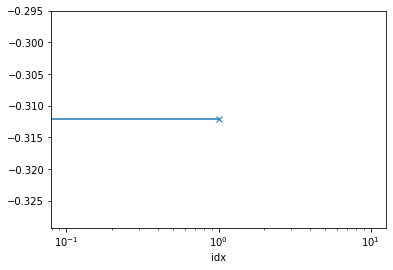

In [37]:
reward_history.plot(style='x-')
plt.semilogx()
#plt.xlim(10,)

In [18]:
eval_path[['holdings', 'reward']] = oos_eval.loc[oos_eval['idx'] == oos_eval['idx'].max(), ['holdings', 'reward']]

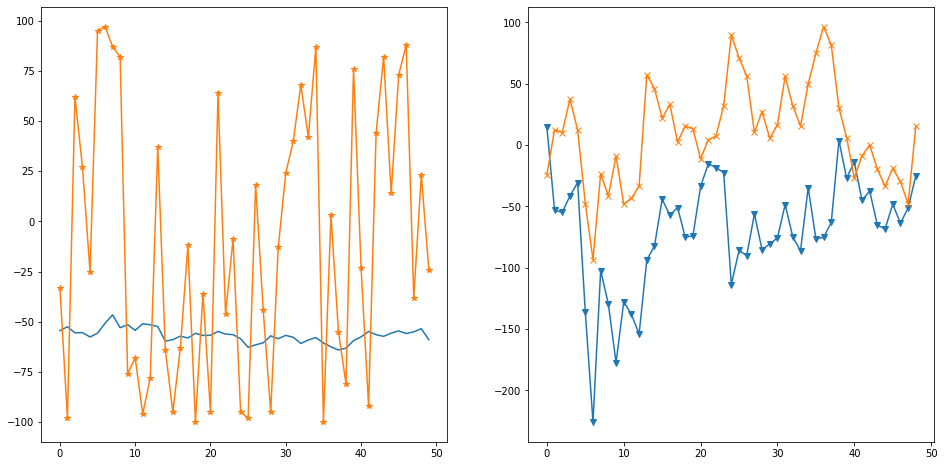

In [19]:
sample_experiment = eval_path.query('episode_idx==900')
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].plot(np.arange(50), sample_experiment.delta * -100, '-')
axes[0].plot(np.arange(50), sample_experiment.holdings, '*-')
axes[1].plot(np.arange(50), ((sample_experiment['price'].shift(-1) - sample_experiment['price']) * sample_experiment['holdings']).cumsum(), 'v-')
axes[1].plot(np.arange(50), ((sample_experiment['call_price'].shift(-1) - sample_experiment['call_price']) * 100).cumsum(), 'x-')



In [20]:
stock_holdings = np.arange(-100,-19)
delta_oom = - stock_holdings
delta_atm = -50 - stock_holdings
delta_itm = -100 - stock_holdings

In [21]:
oom_actions = list(policy_function.iloc[:81]['actions'])
atm_actions = list(policy_function.iloc[81:162]['actions'])
itm_actions = list(policy_function.iloc[162:]['actions'])

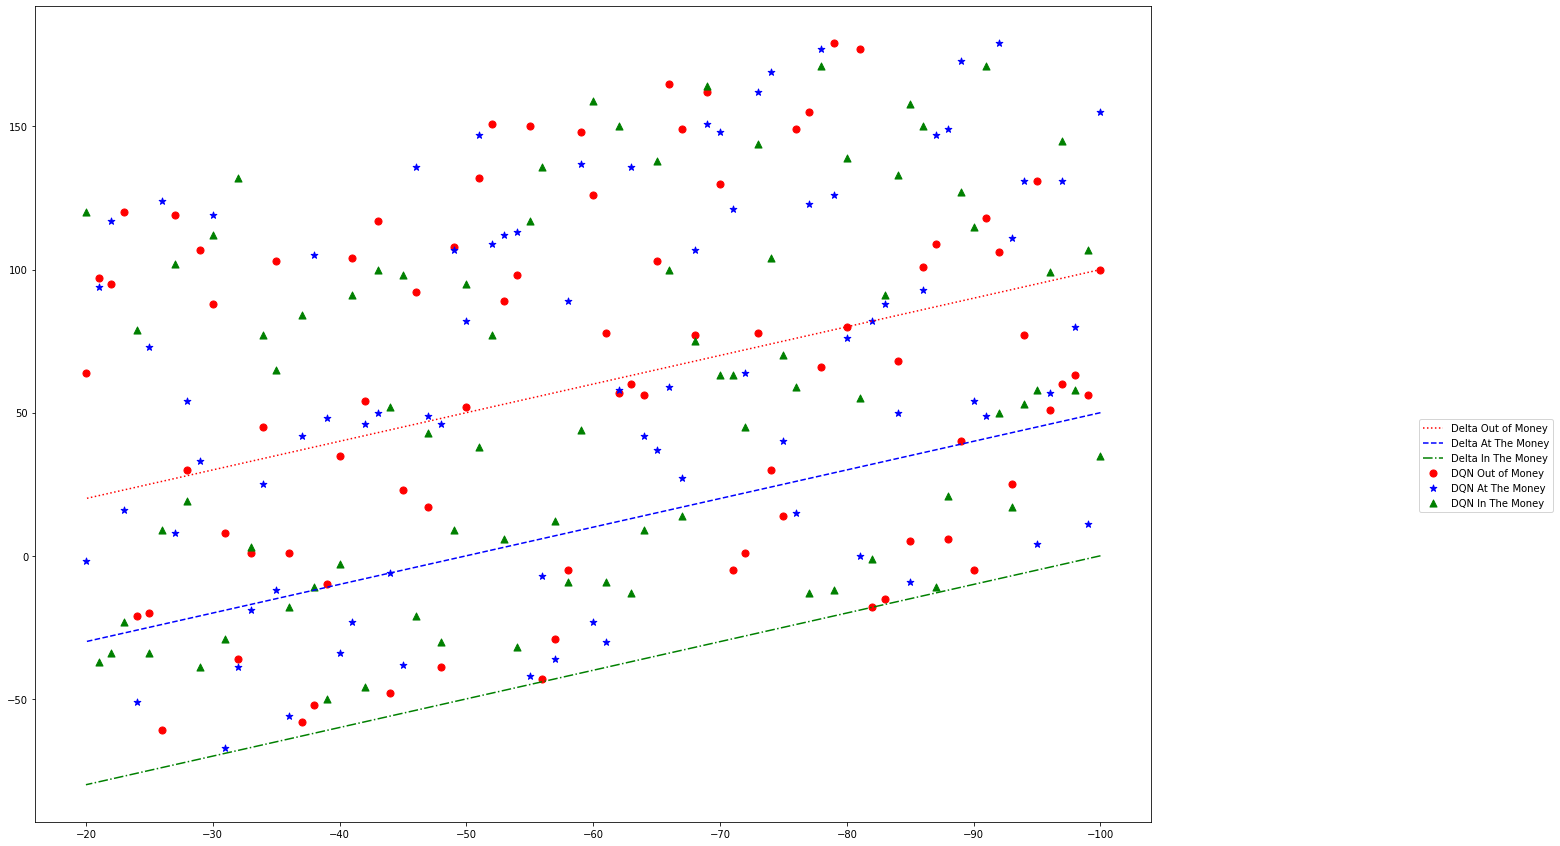

In [22]:
plt.figure(figsize=(20, 15))
plt.plot(stock_holdings, delta_oom, ls=":" , label="Delta Out of Money", color="red") 
plt.plot(stock_holdings, delta_atm, ls="--" , label="Delta At The Money", color="blue") 
plt.plot(stock_holdings, delta_itm, ls="-." , label="Delta In The Money", color="green") 
plt.scatter(stock_holdings, oom_actions - stock_holdings, marker='o', s=50, label="DQN Out of Money", color="red") 
plt.scatter(stock_holdings, atm_actions - stock_holdings, marker='*', s=50, label="DQN At The Money", color="blue") 
plt.scatter(stock_holdings, itm_actions - stock_holdings, marker='^', s=50, label="DQN In The Money", color="green") 
plt.gca().invert_xaxis()
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.5), fancybox=True)